# Project 3: Smart Beta Portfolio and Portfolio Optimization

## Overview


Smart beta has a broad meaning, but we can say in practice that when we use the universe of stocks from an index, and then apply some weighting scheme other than market cap weighting, it can be considered a type of smart beta fund.  A Smart Beta portfolio generally gives investors exposure or "beta" to one or more types of market characteristics (or factors) that are believed to predict prices while giving investors a diversified broad exposure to a particular market. Smart Beta portfolios generally target momentum, earnings quality, low volatility, and dividends or some combination. Smart Beta Portfolios are generally rebalanced infrequently and follow relatively simple rules or algorithms that are passively managed.  Model changes to these types of funds are also rare requiring prospectus filings with US Security and Exchange Commission in the case of US focused mutual funds or ETFs.. Smart Beta portfolios are generally long-only, they do not short stocks.

In contrast, a purely alpha-focused quantitative fund may use multiple models or algorithms to create a portfolio. The portfolio manager retains discretion in upgrading or changing the types of models and how often to rebalance the portfolio in attempt to maximize performance in comparison to a stock benchmark.  Managers may have discretion to short stocks in portfolios.

Imagine you're a portfolio manager, and wish to try out some different portfolio weighting methods.

One way to design portfolio is to look at certain accounting measures (fundamentals) that, based on past trends, indicate stocks that produce better results.  


For instance, you may start with a hypothesis that dividend-issuing stocks tend to perform better than stocks that do not. This may not always be true of all companies; for instance, Apple does not issue dividends, but has had good historical performance.  The hypothesis about dividend-paying stocks may go something like this: 

Companies that regularly issue dividends may also be more prudent in allocating their available cash, and may indicate that they are more conscious of prioritizing shareholder interests.  For example, a CEO may decide to reinvest cash into pet projects that produce low returns.  Or, the CEO may do some analysis, identify that reinvesting within the company produces lower returns compared to a diversified portfolio, and so decide that shareholders would be better served if they were given the cash (in the form of dividends).  So according to this hypothesis, dividends may be both a proxy for how the company is doing (in terms of earnings and cash flow), but also a signal that the company acts in the best interest of its shareholders.  Of course, it's important to test whether this works in practice.


You may also have another hypothesis, with which you wish to design a portfolio that can then be made into an ETF.  You may find that investors may wish to invest in passive beta funds, but wish to have less risk exposure (less volatility) in their investments.  The goal of having a low volatility fund that still produces returns similar to an index may be appealing to investors who have a shorter investment time horizon, and so are more risk averse.

So the objective of your proposed portfolio is to design a portfolio that closely tracks an index, while also minimizing the portfolio variance.  Also, if this portfolio can match the returns of the index with less volatility, then it has a higher risk-adjusted return (same return, lower volatility).

Smart Beta ETFs can be designed with both of these two general methods (among others): alternative weighting and minimum volatility ETF.


## Instructions
Each problem consists of a function to implement and instructions on how to implement the function.  The parts of the function that need to be implemented are marked with a `# TODO` comment. After implementing the function, run the cell to test it against the unit tests we've provided. For each problem, we provide one or more unit tests from our `project_tests` package. These unit tests won't tell you if your answer is correct, but will warn you of any major errors. Your code will be checked for the correct solution when you submit it to Udacity.

## Packages
When you implement the functions, you'll only need to you use the packages you've used in the classroom, like [Pandas](https://pandas.pydata.org/) and [Numpy](http://www.numpy.org/). These packages will be imported for you. We recommend you don't add any import statements, otherwise the grader might not be able to run your code.

The other packages that we're importing are `helper`, `project_helper`, and `project_tests`. These are custom packages built to help you solve the problems.  The `helper` and `project_helper` module contains utility functions and graph functions. The `project_tests` contains the unit tests for all the problems.
### Install Packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 880kB 15.4MB/s ta 0:00:01
    100% |████████████████████████████████| 12.2MB 3.6MB/s eta 0:00:01    93% |██████████████████████████████  | 11.4MB 63.9MB/s eta 0:00:01
    100% |████████████████████████████████| 26.2MB 1.3MB/s eta 0:00:01
    100% |████████████████████████████████| 1.1MB 31.6MB/s ta 0:00:01
    100% |████████████████████████████████| 50.0MB 732kB/s eta 0:00:01  3% |█▏                              | 1.7MB 80.9MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 24.5MB/s ta 0:00:01
    100% |████████████████████████████████| 235kB 39.4MB/s ta 0:00:01
    100% |████████████████████████████████| 143kB 40.8MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 1.2MB 25.3MB/s ta 0:00:01
  Installing build dependencies ... done
    100% |████████████████████████████████| 112kB 38.3MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 29.8MB/s ta 0:00:01
  Installin

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import helper
import project_helper
import project_tests

## Market Data
### Load Data
For this universe of stocks, we'll be selecting large dollar volume stocks. We're using this universe, since it is highly liquid.

In [2]:
df = pd.read_csv('./eod-quotemedia.csv')

percent_top_dollar = 0.2
high_volume_symbols = project_helper.large_dollar_volume_stocks(df, 'adj_close', 'adj_volume', percent_top_dollar)
df = df[df['ticker'].isin(high_volume_symbols)]

close = df.reset_index().pivot(index='date', columns='ticker', values='adj_close')
volume = df.reset_index().pivot(index='date', columns='ticker', values='adj_volume')
dividends = df.reset_index().pivot(index='date', columns='ticker', values='dividends')

### View Data
To see what one of these 2-d matrices looks like, let's take a look at the closing prices matrix.

/home/swaggyprophet/workspace/github.com/ws2234/ai-for-trading-nanodegree/projects/project3-smart-beta-portfolio-optimization/project_helper.py:99: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



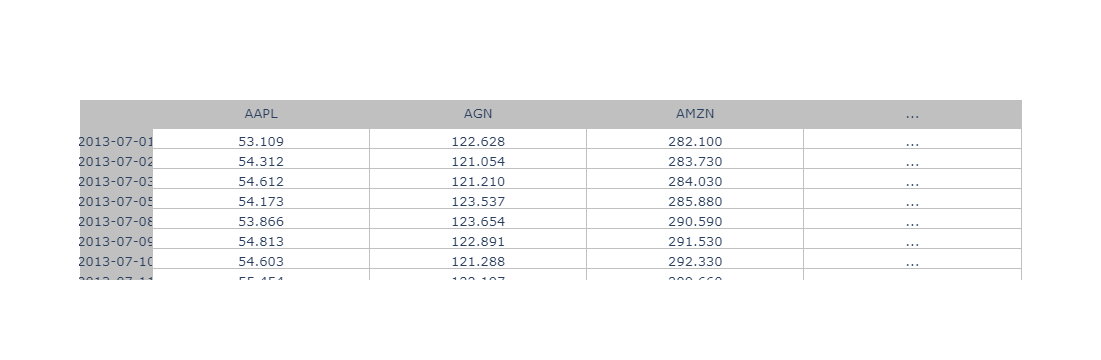

In [3]:
project_helper.print_dataframe(close)

# Part 1: Smart Beta Portfolio
In Part 1 of this project, you'll build a portfolio using dividend yield to choose the portfolio weights. A portfolio such as this could be incorporated into a smart beta ETF.  You'll compare this portfolio to a market cap weighted index to see how well it performs. 

Note that in practice, you'll probably get the index weights from a data vendor (such as companies that create indices, like MSCI, FTSE, Standard and Poor's), but for this exercise we will simulate a market cap weighted index.

## Index Weights
The index we'll be using is based on large dollar volume stocks. Implement `generate_dollar_volume_weights` to generate the weights for this index. For each date, generate the weights based on dollar volume traded for that date. For example, assume the following is close prices and volume data:
```
                 Prices
               A         B         ...
2013-07-08     2         2         ...
2013-07-09     5         6         ...
2013-07-10     1         2         ...
2013-07-11     6         5         ...
...            ...       ...       ...

                 Volume
               A         B         ...
2013-07-08     100       340       ...
2013-07-09     240       220       ...
2013-07-10     120       500       ...
2013-07-11     10        100       ...
...            ...       ...       ...
```
The weights created from the function `generate_dollar_volume_weights` should be the following:
```
               A         B         ...
2013-07-08     0.126..   0.194..   ...
2013-07-09     0.759..   0.377..   ...
2013-07-10     0.075..   0.285..   ...
2013-07-11     0.037..   0.142..   ...
...            ...       ...       ...
```

In [4]:
def generate_dollar_volume_weights(close, volume):
    """
    Generate dollar volume weights.

    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    volume : str
        Volume for each ticker and date

    Returns
    -------
    dollar_volume_weights : DataFrame
        The dollar volume weights for each ticker and date
    """
    assert close.index.equals(volume.index)
    assert close.columns.equals(volume.columns)

    #TODO: Implement function
    dollar_volume = close * volume
    total_dollar_volume = dollar_volume.sum(axis=1)
    weights = dollar_volume.div(total_dollar_volume, axis=0)  

    return weights

project_tests.test_generate_dollar_volume_weights(generate_dollar_volume_weights)

Tests Passed


### View Data
Let's generate the index weights using `generate_dollar_volume_weights` and view them using a heatmap.

In [5]:
index_weights = generate_dollar_volume_weights(close, volume)
project_helper.plot_weights(index_weights, 'Index Weights')

## Portfolio Weights
Now that we have the index weights, let's choose the portfolio weights based on dividend. You would normally calculate the weights based on trailing dividend yield, but we'll simplify this by just calculating the total dividend yield over time.

Implement `calculate_dividend_weights` to return the weights for each stock based on its total dividend yield over time. This is similar to generating the weight for the index, but it's using dividend data instead.
For example, assume the following is `dividends` data:
```
                 Prices
               A         B
2013-07-08     0         0
2013-07-09     0         1
2013-07-10     0.5       0
2013-07-11     0         0
2013-07-12     2         0
...            ...       ...
```
The weights created from the function `calculate_dividend_weights` should be the following:
```
               A         B
2013-07-08     NaN       NaN
2013-07-09     0         1
2013-07-10     0.333..   0.666..
2013-07-11     0.333..   0.666..
2013-07-12     0.714..   0.285..
...            ...       ...
```

In [6]:
def calculate_dividend_weights(dividends):
    """
    Calculate dividend weights.

    Parameters
    ----------
    dividends : DataFrame
        Dividend for each stock and date

    Returns
    -------
    dividend_weights : DataFrame
        Weights for each stock and date
    """
    #TODO: Implement function

    # step 1: keep running total of each stocks dividend
    dividends_cumsum = dividends.cumsum()

    # step 2: keep running total of total dividend up to that date
    # axis=1 specifies that the sum operation is done across columns
    total_dividends = dividends_cumsum.sum(axis=1)

    # step 3: divide individual stock dividend by the total dividend
    # axis=0 specifies that the division is performed for each stock in the row
    dividends_sum = dividends_cumsum.div(total_dividends, axis=0)

    return dividends_sum

project_tests.test_calculate_dividend_weights(calculate_dividend_weights)

Tests Passed


### View Data
Just like the index weights, let's generate the ETF weights and view them using a heatmap.

In [7]:
etf_weights = calculate_dividend_weights(dividends)
project_helper.plot_weights(etf_weights, 'ETF Weights')

## Returns
Implement `generate_returns` to generate returns data for all the stocks and dates from price data. You might notice we're implementing returns and not log returns. Since we're not dealing with volatility, we don't have to use log returns.

In [8]:
def generate_returns(prices):
    """
    Generate returns for ticker and date.

    Parameters
    ----------
    prices : DataFrame
        Price for each ticker and date

    Returns
    -------
    returns : Dataframe
        The returns for each ticker and date
    """
    #TODO: Implement function
    returns = (prices - prices.shift(1)) / prices.shift(1)

    return returns

project_tests.test_generate_returns(generate_returns)

Tests Passed


### View Data
Let's generate the closing returns using `generate_returns` and view them using a heatmap.

In [9]:
returns = generate_returns(close)
project_helper.plot_returns(returns, 'Close Returns')

## Weighted Returns
With the returns of each stock computed, we can use it to compute the returns for an index or ETF. Implement `generate_weighted_returns` to create weighted returns using the returns and weights.

In [10]:
def generate_weighted_returns(returns, weights):
    """
    Generate weighted returns.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    weights : DataFrame
        Weights for each ticker and date

    Returns
    -------
    weighted_returns : DataFrame
        Weighted returns for each ticker and date
    """
    assert returns.index.equals(weights.index)
    assert returns.columns.equals(weights.columns)
    
    #TODO: Implement function
    weighted_returns = returns * weights

    return weighted_returns

project_tests.test_generate_weighted_returns(generate_weighted_returns)

Tests Passed


### View Data
Let's generate the ETF and index returns using `generate_weighted_returns` and view them using a heatmap.

In [11]:
index_weighted_returns = generate_weighted_returns(returns, index_weights)
etf_weighted_returns = generate_weighted_returns(returns, etf_weights)
project_helper.plot_returns(index_weighted_returns, 'Index Returns')
project_helper.plot_returns(etf_weighted_returns, 'ETF Returns')

## Cumulative Returns
To compare performance between the ETF and Index, we're going to calculate the tracking error. Before we do that, we first need to calculate the index and ETF comulative returns. Implement `calculate_cumulative_returns` to calculate the cumulative returns over time given the returns.

In [12]:
def calculate_cumulative_returns(returns):
    """
    Calculate cumulative returns.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date

    Returns
    -------
    cumulative_returns : Pandas Series
        Cumulative returns for each date
    """
    #TODO: Implement function
    # sum returns across all tickers for each day
    # Note: need to retain the NaN values without converting them to 0
    # Hence, need to use apply function to accomplish this
    # daily_returns = returns.sum(axis=1) - incorrectly converts NaN values to 0
    daily_returns = returns.apply(lambda x: x.sum() if not x.isna().all() else np.nan, axis=1)

    # adjust for base investment by adding 1
    adjusted_returns = daily_returns + 1

    # calculate the cumulative product to get the cumulative returns
    cumulative_returns = adjusted_returns.cumprod()
    
    return cumulative_returns

project_tests.test_calculate_cumulative_returns(calculate_cumulative_returns)

Tests Passed


### View Data
Let's generate the ETF and index cumulative returns using `calculate_cumulative_returns` and compare the two.

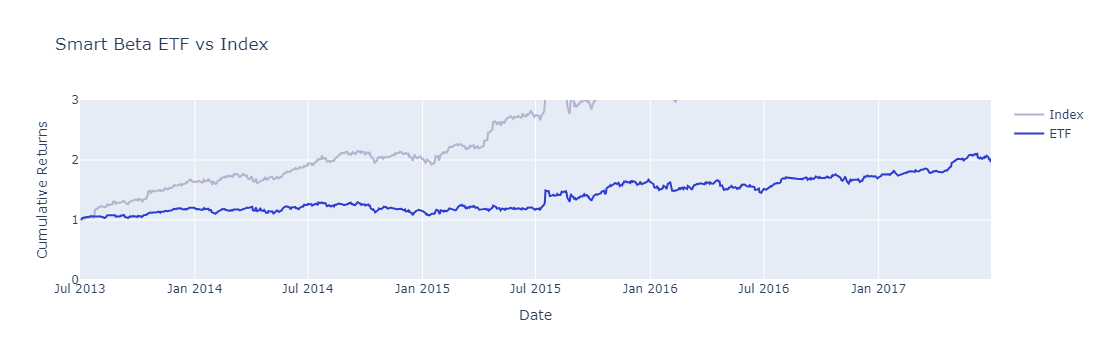

In [13]:
index_weighted_cumulative_returns = calculate_cumulative_returns(index_weighted_returns)
etf_weighted_cumulative_returns = calculate_cumulative_returns(etf_weighted_returns)
project_helper.plot_benchmark_returns(index_weighted_cumulative_returns, etf_weighted_cumulative_returns, 'Smart Beta ETF vs Index')

## Tracking Error
In order to check the performance of the smart beta portfolio, we can calculate the annualized tracking error against the index. Implement `tracking_error` to return the tracking error between the ETF and benchmark.

For reference, we'll be using the following annualized tracking error function:
$$ TE = \sqrt{252} * SampleStdev(r_p - r_b) $$

Where $ r_p $ is the portfolio/ETF returns and $ r_b $ is the benchmark returns.

_Note: When calculating the sample standard deviation, the delta degrees of freedom is 1, which is the also the default value._

In [14]:
def tracking_error(benchmark_returns_by_date, etf_returns_by_date):
    """
    Calculate the tracking error.

    Parameters
    ----------
    benchmark_returns_by_date : Pandas Series
        The benchmark returns for each date
    etf_returns_by_date : Pandas Series
        The ETF returns for each date

    Returns
    -------
    tracking_error : float
        The tracking error
    """
    assert benchmark_returns_by_date.index.equals(etf_returns_by_date.index)
    
    #TODO: Implement function
    # step 1: calculate the excess (sample) return
    sample_return = etf_returns_by_date - benchmark_returns_by_date

    # step 2: take sample standard deviation of the sample return
    sample_stdev = sample_return.std()

    # step 3: annualize the sample standard deviation
    annualized_sample_stdev = np.sqrt(252) * sample_stdev

    return annualized_sample_stdev

project_tests.test_tracking_error(tracking_error)

Tests Passed


### View Data
Let's generate the tracking error using `tracking_error`.

In [15]:
smart_beta_tracking_error = tracking_error(np.sum(index_weighted_returns, 1), np.sum(etf_weighted_returns, 1))
print('Smart Beta Tracking Error: {}'.format(smart_beta_tracking_error))

Smart Beta Tracking Error: 0.1576542263192221


# Part 2: Portfolio Optimization

Now, let's create a second portfolio.  We'll still reuse the market cap weighted index, but this will be independent of the dividend-weighted portfolio that we created in part 1.

We want to both minimize the portfolio variance and also want to closely track a market cap weighted index.  In other words, we're trying to minimize the distance between the weights of our portfolio and the weights of the index.

$Minimize \left [ \sigma^2_p + \lambda \sqrt{\sum_{1}^{m}(weight_i - indexWeight_i)^2} \right  ]$ where $m$ is the number of stocks in the portfolio, and $\lambda$ is a scaling factor that you can choose.

Why are we doing this? One way that investors evaluate a fund is by how well it tracks its index. The fund is still expected to deviate from the index within a certain range in order to improve fund performance.  A way for a fund to track the performance of its benchmark is by keeping its asset weights similar to the weights of the index.  We’d expect that if the fund has the same stocks as the benchmark, and also the same weights for each stock as the benchmark, the fund would yield about the same returns as the benchmark. By minimizing a linear combination of both the portfolio risk and distance between portfolio and benchmark weights, we attempt to balance the desire to minimize portfolio variance with the goal of tracking the index.


## Covariance
Implement `get_covariance_returns` to calculate the covariance of the `returns`. We'll use this to calculate the portfolio variance.

If we have $m$ stock series, the covariance matrix is an $m \times m$ matrix containing the covariance between each pair of stocks.  We can use [`Numpy.cov`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) to get the covariance.  We give it a 2D array in which each row is a stock series, and each column is an observation at the same period of time. For any `NaN` values, you can replace them with zeros using the [`DataFrame.fillna`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) function.

The covariance matrix $\mathbf{P} = 
\begin{bmatrix}
\sigma^2_{1,1} & ... & \sigma^2_{1,m} \\ 
... & ... & ...\\
\sigma_{m,1} & ... & \sigma^2_{m,m}  \\
\end{bmatrix}$

In [16]:
def get_covariance_returns(returns):
    """
    Calculate covariance matrices.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date

    Returns
    -------
    returns_covariance  : 2 dimensional Ndarray
        The covariance of the returns
    """
    #TODO: Implement function
    filled_returns = returns.fillna(0)
    # transpose the data so each row represents a ticker and each column a date
    transposed_returns = filled_returns.T
    returns_covariance = np.cov(transposed_returns)
    return returns_covariance

project_tests.test_get_covariance_returns(get_covariance_returns)

Tests Passed


### View Data
Let's look at the covariance generated from `get_covariance_returns`.

In [17]:
covariance_returns = get_covariance_returns(returns)
covariance_returns = pd.DataFrame(covariance_returns, returns.columns, returns.columns)

covariance_returns_correlation = np.linalg.inv(np.diag(np.sqrt(np.diag(covariance_returns))))
covariance_returns_correlation = pd.DataFrame(
    covariance_returns_correlation.dot(covariance_returns).dot(covariance_returns_correlation),
    covariance_returns.index,
    covariance_returns.columns)

project_helper.plot_covariance_returns_correlation(
    covariance_returns_correlation,
    'Covariance Returns Correlation Matrix')

### portfolio variance
We can write the portfolio variance $\sigma^2_p = \mathbf{x^T} \mathbf{P} \mathbf{x}$

Recall that the $\mathbf{x^T} \mathbf{P} \mathbf{x}$ is called the quadratic form.
We can use the cvxpy function `quad_form(x,P)` to get the quadratic form.

### Distance from index weights
We want portfolio weights that track the index closely.  So we want to minimize the distance between them.
Recall from the Pythagorean theorem that you can get the distance between two points in an x,y plane by adding the square of the x and y distances and taking the square root.  Extending this to any number of dimensions is called the L2 norm.  So: $\sqrt{\sum_{1}^{n}(weight_i - indexWeight_i)^2}$  Can also be written as $\left \| \mathbf{x} - \mathbf{index} \right \|_2$.  There's a cvxpy function called [norm()](https://www.cvxpy.org/api_reference/cvxpy.atoms.other_atoms.html#norm)
`norm(x, p=2, axis=None)`.  The default is already set to find an L2 norm, so you would pass in one argument, which is the difference between your portfolio weights and the index weights.

### objective function
We want to minimize both the portfolio variance and the distance of the portfolio weights from the index weights.
We also want to choose a `scale` constant, which is $\lambda$ in the expression. 

$\mathbf{x^T} \mathbf{P} \mathbf{x} + \lambda \left \| \mathbf{x} - \mathbf{index} \right \|_2$


This lets us choose how much priority we give to minimizing the difference from the index, relative to minimizing the variance of the portfolio.  If you choose a higher value for `scale` ($\lambda$).

We can find the objective function using cvxpy `objective = cvx.Minimize()`.  Can you guess what to pass into this function?



### constraints
We can also define our constraints in a list.  For example, you'd want the weights to sum to one. So $\sum_{1}^{n}x = 1$.  You may also need to go long only, which means no shorting, so no negative weights.  So $x_i >0 $ for all $i$. you could save a variable as `[x >= 0, sum(x) == 1]`, where x was created using `cvx.Variable()`.

### optimization
So now that we have our objective function and constraints, we can solve for the values of $\mathbf{x}$.
cvxpy has the constructor `Problem(objective, constraints)`, which returns a `Problem` object.

The `Problem` object has a function solve(), which returns the minimum of the solution.  In this case, this is the minimum variance of the portfolio.

It also updates the vector $\mathbf{x}$.

We can check out the values of $x_A$ and $x_B$ that gave the minimum portfolio variance by using `x.value`

In [32]:
import cvxpy as cvx

def get_optimal_weights(covariance_returns, index_weights, scale=2.0):
    """
    Find the optimal weights.

    Parameters
    ----------
    covariance_returns : 2 dimensional Ndarray
        The covariance of the returns
    index_weights : Pandas Series
        Index weights for all tickers at a period in time
    scale : int
        The penalty factor for weights the deviate from the index 
    Returns
    -------
    x : 1 dimensional Ndarray
        The solution for x
    """
    assert len(covariance_returns.shape) == 2
    assert len(index_weights.shape) == 1
    assert covariance_returns.shape[0] == covariance_returns.shape[1]  == index_weights.shape[0]

    #TODO: Implement function
    m = len(covariance_returns)

    # x variables (to be found with optimization)
    x = cvx.Variable(m)

    # portfolio variance, in quadratic form
    portfolio_variance = cvx.quad_form(x,covariance_returns)

    # euclidean distance (L2 norm) between portfolio and index weights
    distance_to_index = cvx.norm(x - index_weights, p=2, axis=None)

    # objective function
    objective = cvx.Minimize(portfolio_variance + scale * distance_to_index)

    # define constraints
    constraints = [x >= 0, sum(x) == 1]
    
    # use cvxpy to solve the objective
    problem = cvx.Problem(objective, constraints)
    problem.solve()
    
    # retrieve the weights of the optimized portfolio
    x_values = x.value
    
    return x_values

project_tests.test_get_optimal_weights(get_optimal_weights)

A   0.23623892
B   0.01256280
C   0.75119820
dtype: float64
Tests Passed


/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    



## Optimized Portfolio
Using the `get_optimal_weights` function, let's generate the optimal ETF weights without rebalanceing. We can do this by feeding in the covariance of the entire history of data. We also need to feed in a set of index weights. We'll go with the average weights of the index over time.

In [21]:
raw_optimal_single_rebalance_etf_weights = get_optimal_weights(covariance_returns.values, index_weights.iloc[-1])
optimal_single_rebalance_etf_weights = pd.DataFrame(
    np.tile(raw_optimal_single_rebalance_etf_weights, (len(returns.index), 1)),
    returns.index,
    returns.columns)

With our ETF weights built, let's compare it to the index. Run the next cell to calculate the ETF returns and compare it to the index returns.

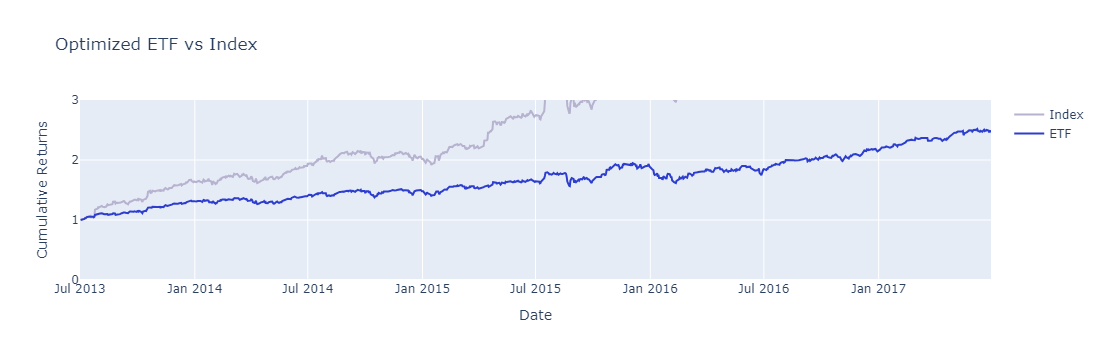

Optimized ETF Tracking Error: 0.08866738037078957


In [22]:
optim_etf_returns = generate_weighted_returns(returns, optimal_single_rebalance_etf_weights)
optim_etf_cumulative_returns = calculate_cumulative_returns(optim_etf_returns)
project_helper.plot_benchmark_returns(index_weighted_cumulative_returns, optim_etf_cumulative_returns, 'Optimized ETF vs Index')

optim_etf_tracking_error = tracking_error(np.sum(index_weighted_returns, 1), np.sum(optim_etf_returns, 1))
print('Optimized ETF Tracking Error: {}'.format(optim_etf_tracking_error))

## Rebalance Portfolio Over Time
The single optimized ETF portfolio used the same weights for the entire history. This might not be the optimal weights for the entire period. Let's rebalance the portfolio over the same period instead of using the same weights. Implement `rebalance_portfolio` to rebalance a portfolio.

Reblance the portfolio every n number of days, which is given as `shift_size`. When rebalancing, you should look back a certain number of days of data in the past, denoted as `chunk_size`. Using this data, compute the optoimal weights using `get_optimal_weights` and `get_covariance_returns`.

In [65]:
def rebalance_portfolio(returns, index_weights, shift_size, chunk_size):
    """
    Get weights for each rebalancing of the portfolio.

    Parameters
    ----------
    returns : DataFrame
        Returns for each ticker and date
    index_weights : DataFrame
        Index weight for each ticker and date
    shift_size : int
        The number of days between each rebalance
    chunk_size : int
        The number of days to look in the past for rebalancing

    Returns
    -------
    all_rebalance_weights  : list of Ndarrays
        The ETF weights for each point they are rebalanced
    """
    assert returns.index.equals(index_weights.index)
    assert returns.columns.equals(index_weights.columns)
    assert shift_size > 0
    assert chunk_size >= 0
    
    #TODO: Implement function
    all_rebalance_weights = list()

    i = chunk_size
    while i < len(returns) and i < len(index_weights):
        lookback_index = i - chunk_size
        subset_returns = returns.iloc[lookback_index:i]
        subset_index_weights = index_weights.iloc[lookback_index:i]
        optimal_weights = get_optimal_weights(get_covariance_returns(subset_returns), subset_index_weights.iloc[-1], 2.0)
        all_rebalance_weights.append(optimal_weights)
        i += shift_size
    return all_rebalance_weights

project_tests.test_rebalance_portfolio(rebalance_portfolio)

SZS   0.00395679
BGT   0.12434660
NNH   0.00335064
Name: 2009-05-06, dtype: float64
SZS   0.00369562
BGT   0.11447422
NNH   0.00325973
Name: 2009-05-08, dtype: float64
SZS   0.00366501
BGT   0.10806014
NNH   0.00314648
Name: 2009-05-10, dtype: float64
SZS   0.00358844
BGT   0.10097531
NNH   0.00319009
Name: 2009-05-12, dtype: float64
Tests Passed


/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

Run the following cell to rebalance the portfolio using `rebalance_portfolio`.

In [66]:
chunk_size = 250
shift_size = 5
all_rebalance_weights = rebalance_portfolio(returns, index_weights, shift_size, chunk_size)

ticker
AAPL    0.15132697
AGN     0.02265303
AMZN    0.04820881
BAC     0.05469979
C       0.04715696
FB      0.17538326
GE      0.02924641
GILD    0.02883132
GOOG    0.05486697
GOOGL   0.06420264
INTC    0.04016725
JNJ     0.02651301
JPM     0.03350138
MSFT    0.04899234
NFLX    0.04902706
PFE     0.02732390
T       0.02479036
WFC     0.03216488
XOM     0.04094366
Name: 2014-06-26, dtype: float64
ticker
AAPL    0.15006822
AGN     0.02925789
AMZN    0.04916534
BAC     0.08009238
C       0.04757062
FB      0.12518031
GE      0.03616680
GILD    0.05556689
GOOG    0.03120252
GOOGL   0.03994450
INTC    0.04246898
JNJ     0.02972385
JPM     0.04870425
MSFT    0.04537815
NFLX    0.05743297
PFE     0.02938424
T       0.02547259
WFC     0.03099225
XOM     0.04622724
Name: 2014-07-03, dtype: float64
ticker
AAPL    0.15011372
AGN     0.01131574
AMZN    0.14312662
BAC     0.04114198
C       0.03433711
FB      0.12941304
GE      0.04105421
GILD    0.04603916
GOOG    0.04665278
GOOGL   0.04416613
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.22008943
AGN     0.02632022
AMZN    0.04457549
BAC     0.07727864
C       0.03718190
FB      0.10828186
GE      0.02333529
GILD    0.05301683
GOOG    0.04371684
GOOGL   0.04709734
INTC    0.03498841
JNJ     0.02484618
JPM     0.03155110
MSFT    0.07335965
NFLX    0.04517978
PFE     0.02829962
T       0.02028541
WFC     0.02778318
XOM     0.03281283
Name: 2014-09-22, dtype: float64
ticker
AAPL    0.23948399
AGN     0.02130970
AMZN    0.03192099
BAC     0.05636241
C       0.03358515
FB      0.13819604
GE      0.03548896
GILD    0.04124240
GOOG    0.03795863
GOOGL   0.03459665
INTC    0.04665805
JNJ     0.03252183
JPM     0.02999314
MSFT    0.05686011
NFLX    0.03142044
PFE     0.02666467
T       0.02231219
WFC     0.02387734
XOM     0.05954730
Name: 2014-09-29, dtype: float64
ticker
AAPL    0.19574007
AGN     0.02341774
AMZN    0.04192004
BAC     0.06152822
C       0.03626118
FB      0.11316235
GE      0.03852642
GILD    0.06216520
GOOG    0.03966104
GOOGL   0.04287120
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.24627808
AGN     0.01947551
AMZN    0.04829729
BAC     0.06111142
C       0.05402478
FB      0.07436747
GE      0.02803697
GILD    0.04234108
GOOG    0.03809213
GOOGL   0.04437585
INTC    0.03620545
JNJ     0.02698463
JPM     0.04266478
MSFT    0.04059921
NFLX    0.03372794
PFE     0.02831390
T       0.06196394
WFC     0.02434646
XOM     0.04879311
Name: 2014-12-09, dtype: float64
ticker
AAPL    0.19524787
AGN     0.02671506
AMZN    0.06145679
BAC     0.04887685
C       0.05494141
FB      0.07550706
GE      0.03353003
GILD    0.03882210
GOOG    0.06274474
GOOGL   0.06942387
INTC    0.03205184
JNJ     0.03053098
JPM     0.03529518
MSFT    0.06353852
NFLX    0.02459368
PFE     0.02047404
T       0.02484106
WFC     0.03708766
XOM     0.06432124
Name: 2014-12-16, dtype: float64
ticker
AAPL    0.11543648
AGN     0.02748540
AMZN    0.03493671
BAC     0.06746156
C       0.02705818
FB      0.06719623
GE      0.03039533
GILD    0.21179701
GOOG    0.04879365
GOOGL   0.06504685
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.39703150
AGN     0.03494684
AMZN    0.03273635
BAC     0.04205665
C       0.03354524
FB      0.05624704
GE      0.02726404
GILD    0.03273381
GOOG    0.02254519
GOOGL   0.02522134
INTC    0.03679228
JNJ     0.01963352
JPM     0.02741061
MSFT    0.04762602
NFLX    0.04518428
PFE     0.03523620
T       0.02052582
WFC     0.02224191
XOM     0.04102135
Name: 2015-03-09, dtype: float64
ticker
AAPL    0.18549107
AGN     0.08141909
AMZN    0.03857442
BAC     0.04277757
C       0.03873919
FB      0.06614988
GE      0.03478106
GILD    0.04325895
GOOG    0.03982809
GOOGL   0.04542462
INTC    0.04068819
JNJ     0.03133940
JPM     0.03776461
MSFT    0.05953165
NFLX    0.07089594
PFE     0.03897916
T       0.02517576
WFC     0.03454642
XOM     0.04463492
Name: 2015-03-16, dtype: float64
ticker
AAPL    0.19660985
AGN     0.04285070
AMZN    0.03651515
BAC     0.04734268
C       0.02895455
FB      0.10040709
GE      0.03185882
GILD    0.07246181
GOOG    0.03982154
GOOGL   0.03715251
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.19260376
AGN     0.02683904
AMZN    0.04539839
BAC     0.07153653
C       0.04721086
FB      0.07286324
GE      0.04353139
GILD    0.06468040
GOOG    0.03325380
GOOGL   0.03242826
INTC    0.04005090
JNJ     0.02717864
JPM     0.04431058
MSFT    0.05965710
NFLX    0.04533203
PFE     0.03100256
T       0.04411112
WFC     0.04453924
XOM     0.03347216
Name: 2015-06-17, dtype: float64
ticker
AAPL    0.20827635
AGN     0.01548315
AMZN    0.03588930
BAC     0.03067995
C       0.03270637
FB      0.11419309
GE      0.02493362
GILD    0.02938144
GOOG    0.02149537
GOOGL   0.02509218
INTC    0.02116425
JNJ     0.02061943
JPM     0.03360722
MSFT    0.04606114
NFLX    0.23229543
PFE     0.02196933
T       0.03186584
WFC     0.02650087
XOM     0.02778568
Name: 2015-06-24, dtype: float64
ticker
AAPL    0.17021522
AGN     0.02480469
AMZN    0.04081753
BAC     0.04819315
C       0.04448164
FB      0.10310204
GE      0.03456270
GILD    0.05180989
GOOG    0.04806808
GOOGL   0.03924206
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.20760975
AGN     0.04558770
AMZN    0.07162079
BAC     0.04575476
C       0.03701069
FB      0.09105809
GE      0.03011319
GILD    0.05058055
GOOG    0.04508993
GOOGL   0.05258974
INTC    0.02631967
JNJ     0.03090598
JPM     0.03555140
MSFT    0.04101905
NFLX    0.06606675
PFE     0.03366417
T       0.02580295
WFC     0.02962258
XOM     0.03403227
Name: 2015-09-25, dtype: float64
ticker
AAPL    0.17640880
AGN     0.03911757
AMZN    0.07091892
BAC     0.07768380
C       0.03815944
FB      0.10101998
GE      0.02881981
GILD    0.05076275
GOOG    0.04875040
GOOGL   0.04642033
INTC    0.02276721
JNJ     0.02113514
JPM     0.03365548
MSFT    0.05176529
NFLX    0.06615983
PFE     0.03604948
T       0.02341062
WFC     0.02964381
XOM     0.03735135
Name: 2015-10-02, dtype: float64
ticker
AAPL    0.21941582
AGN     0.03977606
AMZN    0.07446436
BAC     0.04468481
C       0.02778688
FB      0.07276932
GE      0.04742796
GILD    0.03152566
GOOG    0.04138183
GOOGL   0.04204432
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.15053854
AGN     0.02272909
AMZN    0.18649943
BAC     0.03554360
C       0.02439838
FB      0.08634996
GE      0.04515077
GILD    0.03465103
GOOG    0.06423160
GOOGL   0.07148883
INTC    0.02191081
JNJ     0.01928386
JPM     0.02886149
MSFT    0.06935335
NFLX    0.04554456
PFE     0.02383961
T       0.02072358
WFC     0.01901133
XOM     0.02989019
Name: 2015-12-29, dtype: float64
ticker
AAPL    0.18838743
AGN     0.02569726
AMZN    0.09646507
BAC     0.04544146
C       0.03122971
FB      0.07393723
GE      0.05001206
GILD    0.03366816
GOOG    0.04142566
GOOGL   0.05236567
INTC    0.02243486
JNJ     0.02077245
JPM     0.03885094
MSFT    0.05767721
NFLX    0.11126583
PFE     0.02126245
T       0.02343405
WFC     0.02762886
XOM     0.03804364
Name: 2016-01-06, dtype: float64
ticker
AAPL    0.15314564
AGN     0.02722610
AMZN    0.11743905
BAC     0.04513242
C       0.03220690
FB      0.08407884
GE      0.03826744
GILD    0.02770262
GOOG    0.04621239
GOOGL   0.04907276
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.15612262
AGN     0.05912713
AMZN    0.05740607
BAC     0.03047186
C       0.02295223
FB      0.21374747
GE      0.05108209
GILD    0.03054845
GOOG    0.03311385
GOOGL   0.04034906
INTC    0.02537522
JNJ     0.04274058
JPM     0.02706335
MSFT    0.03905701
NFLX    0.04471453
PFE     0.05561516
T       0.02484157
WFC     0.02154969
XOM     0.02412205
Name: 2016-04-04, dtype: float64
ticker
AAPL    0.12230651
AGN     0.08321963
AMZN    0.06402373
BAC     0.03943859
C       0.03336646
FB      0.17216876
GE      0.02849629
GILD    0.03147807
GOOG    0.03567994
GOOGL   0.04781250
INTC    0.02326126
JNJ     0.02782515
JPM     0.03864227
MSFT    0.04391240
NFLX    0.03039590
PFE     0.09688643
T       0.02445025
WFC     0.02643804
XOM     0.03019783
Name: 2016-04-11, dtype: float64
ticker
AAPL    0.21876473
AGN     0.03277557
AMZN    0.09655869
BAC     0.03907799
C       0.03492178
FB      0.08147662
GE      0.02120522
GILD    0.02621710
GOOG    0.04164685
GOOGL   0.04603527
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.11464873
AGN     0.02188898
AMZN    0.11659390
BAC     0.04748459
C       0.04430235
FB      0.11399721
GE      0.03829599
GILD    0.03149729
GOOG    0.03954301
GOOGL   0.04112249
INTC    0.02638480
JNJ     0.04357659
JPM     0.04717813
MSFT    0.05560077
NFLX    0.06189518
PFE     0.03447014
T       0.04186041
WFC     0.03362648
XOM     0.04603296
Name: 2016-07-06, dtype: float64
ticker
AAPL    0.11790281
AGN     0.04314639
AMZN    0.14967215
BAC     0.04715645
C       0.04188686
FB      0.09209149
GE      0.04783918
GILD    0.03286892
GOOG    0.03264796
GOOGL   0.03626782
INTC    0.04694048
JNJ     0.02969528
JPM     0.05429915
MSFT    0.06319081
NFLX    0.04114207
PFE     0.02270615
T       0.02815482
WFC     0.03189608
XOM     0.04049514
Name: 2016-07-13, dtype: float64
ticker
AAPL    0.10217487
AGN     0.02152321
AMZN    0.06647851
BAC     0.04449702
C       0.02873953
FB      0.09840923
GE      0.04395481
GILD    0.02986899
GOOG    0.03848858
GOOGL   0.03429753
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.16222174
AGN     0.04384401
AMZN    0.10400048
BAC     0.04915360
C       0.04269767
FB      0.08887361
GE      0.03127666
GILD    0.02983771
GOOG    0.04310098
GOOGL   0.04465576
INTC    0.02421842
JNJ     0.03384382
JPM     0.04733705
MSFT    0.05630004
NFLX    0.03382727
PFE     0.03004908
T       0.02595125
WFC     0.07631081
XOM     0.03250005
Name: 2016-10-13, dtype: float64
ticker
AAPL    0.11135246
AGN     0.04047354
AMZN    0.10367601
BAC     0.05762816
C       0.02649755
FB      0.06948461
GE      0.03164843
GILD    0.02969338
GOOG    0.05685728
GOOGL   0.04648795
INTC    0.03519933
JNJ     0.03104840
JPM     0.03767630
MSFT    0.11069793
NFLX    0.07256616
PFE     0.02382615
T       0.04522272
WFC     0.04721891
XOM     0.02274474
Name: 2016-10-20, dtype: float64
ticker
AAPL    0.12900737
AGN     0.01674271
AMZN    0.20345504
BAC     0.05410982
C       0.03130142
FB      0.07288126
GE      0.02306907
GILD    0.02322944
GOOG    0.07339825
GOOGL   0.08158151
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.10892123
AGN     0.05705100
AMZN    0.08604125
BAC     0.08315926
C       0.03773917
FB      0.11035802
GE      0.03305632
GILD    0.12107473
GOOG    0.03432070
GOOGL   0.03969062
INTC    0.02690089
JNJ     0.02111128
JPM     0.04270156
MSFT    0.04081595
NFLX    0.03661072
PFE     0.02157292
T       0.02224783
WFC     0.03669744
XOM     0.03992910
Name: 2017-02-08, dtype: float64
ticker
AAPL    0.16746254
AGN     0.03029393
AMZN    0.08851057
BAC     0.12846036
C       0.04702004
FB      0.06244038
GE      0.02600870
GILD    0.03936084
GOOG    0.03806059
GOOGL   0.04020351
INTC    0.02277127
JNJ     0.02384028
JPM     0.05393421
MSFT    0.03786737
NFLX    0.02672167
PFE     0.05153786
T       0.03179069
WFC     0.05072927
XOM     0.03298591
Name: 2017-02-15, dtype: float64
ticker
AAPL    0.11664717
AGN     0.01980012
AMZN    0.12365447
BAC     0.08638861
C       0.03640190
FB      0.10451735
GE      0.03491347
GILD    0.02094833
GOOG    0.05131650
GOOGL   0.04946004
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS sol

ticker
AAPL    0.15739106
AGN     0.01769044
AMZN    0.16394603
BAC     0.05445750
C       0.03139706
FB      0.10827036
GE      0.03824157
GILD    0.01187166
GOOG    0.05772330
GOOGL   0.07713917
INTC    0.01869525
JNJ     0.02350267
JPM     0.03200445
MSFT    0.06457490
NFLX    0.03726602
PFE     0.01718676
T       0.02354819
WFC     0.03447358
XOM     0.03062005
Name: 2017-05-26, dtype: float64
ticker
AAPL    0.17420710
AGN     0.01578867
AMZN    0.12481526
BAC     0.05156637
C       0.02736920
FB      0.08728063
GE      0.05295079
GILD    0.01772004
GOOG    0.05588806
GOOGL   0.06281216
INTC    0.01878247
JNJ     0.02670742
JPM     0.03321478
MSFT    0.10718346
NFLX    0.02902399
PFE     0.02011332
T       0.02308255
WFC     0.03119360
XOM     0.04030013
Name: 2017-06-05, dtype: float64
ticker
AAPL    0.19217429
AGN     0.00820161
AMZN    0.16920978
BAC     0.03723219
C       0.03218668
FB      0.09139718
GE      0.07161343
GILD    0.01224948
GOOG    0.06587110
GOOGL   0.07502234
I

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

/home/swaggyprophet/.local/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    



## Portfolio Turnover
With the portfolio rebalanced, we need to use a metric to measure the cost of rebalancing the portfolio. Implement `get_portfolio_turnover` to calculate the annual portfolio turnover. We'll be using the formulas used in the classroom:

$ AnnualizedTurnover =\frac{SumTotalTurnover}{NumberOfRebalanceEvents} * NumberofRebalanceEventsPerYear $

$ SumTotalTurnover =\sum_{t,n}{\left | x_{t,n} - x_{t+1,n} \right |} $ Where $ x_{t,n} $ are the weights at time $ t $ for equity $ n $.

$ SumTotalTurnover $ is just a different way of writing $ \sum \left | x_{t_1,n} - x_{t_2,n} \right | $

In [71]:
def get_portfolio_turnover(all_rebalance_weights, shift_size, rebalance_count, n_trading_days_in_year=252):
    """
    Calculage portfolio turnover.

    Parameters
    ----------
    all_rebalance_weights : list of Ndarrays
        The ETF weights for each point they are rebalanced
    shift_size : int
        The number of days between each rebalance
    rebalance_count : int
        Number of times the portfolio was rebalanced
    n_trading_days_in_year: int
        Number of trading days in a year

    Returns
    -------
    portfolio_turnover  : float
        The portfolio turnover
    """
    assert shift_size > 0
    assert rebalance_count > 0
    
    #TODO: Implement function
    sum_total_turnover = 0
    # calculate turnover for each rebalance event
    for i in range(1, len(all_rebalance_weights)):
        # calculate absolute difference between consecutive rebalances
        turnover = np.abs(all_rebalance_weights[i] - all_rebalance_weights[i-1]).sum()
        sum_total_turnover += turnover
        
    portfolio_turnover = (sum_total_turnover/rebalance_count) * (n_trading_days_in_year//shift_size)
    
    return portfolio_turnover

project_tests.test_get_portfolio_turnover(get_portfolio_turnover)

Tests Passed


Run the following cell to get the portfolio turnover from  `get_portfolio turnover`.

In [72]:
print(get_portfolio_turnover(all_rebalance_weights, shift_size, len(all_rebalance_weights) - 1))

15.035130708935924


That's it! You've built a smart beta portfolio in part 1 and did portfolio optimization in part 2. You can now submit your project.

## Submission
Now that you're done with the project, it's time to submit it. Click the submit button in the bottom right. One of our reviewers will give you feedback on your project with a pass or not passed grade. You can continue to the next section while you wait for feedback.